#Trabalho Prático - Processamento Linguagem Natural

Nome: Rafael Zardo Crevelari \\
Matrícula: 105468

# Comentarios Gerais:
Utilizei o Colab (https://colab.research.google.com/drive1Xz6Wr528Oshj1fBD-d-su8CYIYJDbuix?authuser=1#scrollTo=-U11NaBQ5kaF) disponibilizado pelo professor como ferramenta de estudo e compreensão do conteúdo proposto no trabalho. Algumas partes deste trabalho foram fundamentadas nesse Colab, com o intuito de compreender e aplicar boas práticas.


# 1) Acesse a base de dados disponibilizada


In [1]:
# corpus 1
import requests
req = requests.get("https://raw.githubusercontent.com/juliosoaresreis/NLP/main/data/biblia.txt")
url_content = req.content
arquivo = open("biblia.txt", "wb")
arquivo.write(url_content)
arquivo.close()
!ls

biblia.txt  sample_data  word2vec_model.bin  word2vecModel.bin


#2) Analise a base de dados e plote os unigramas e bigramas mais comuns

Corpus Construido
Numero de linhas: 32359
Numero de palavras 743047
Tamanho vocabulario: 25932
-------------------------------------
=========== Unigramas ================
-------------------------------------


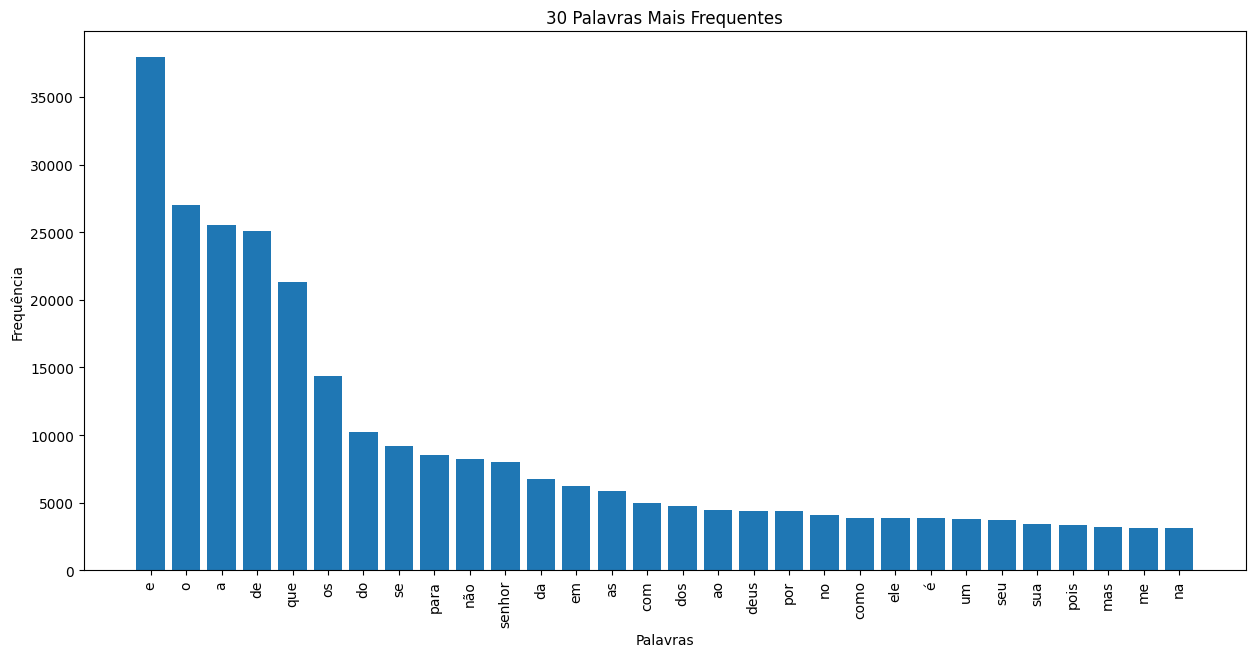

-------------------------------------
=========== Bigramas ================
-------------------------------------


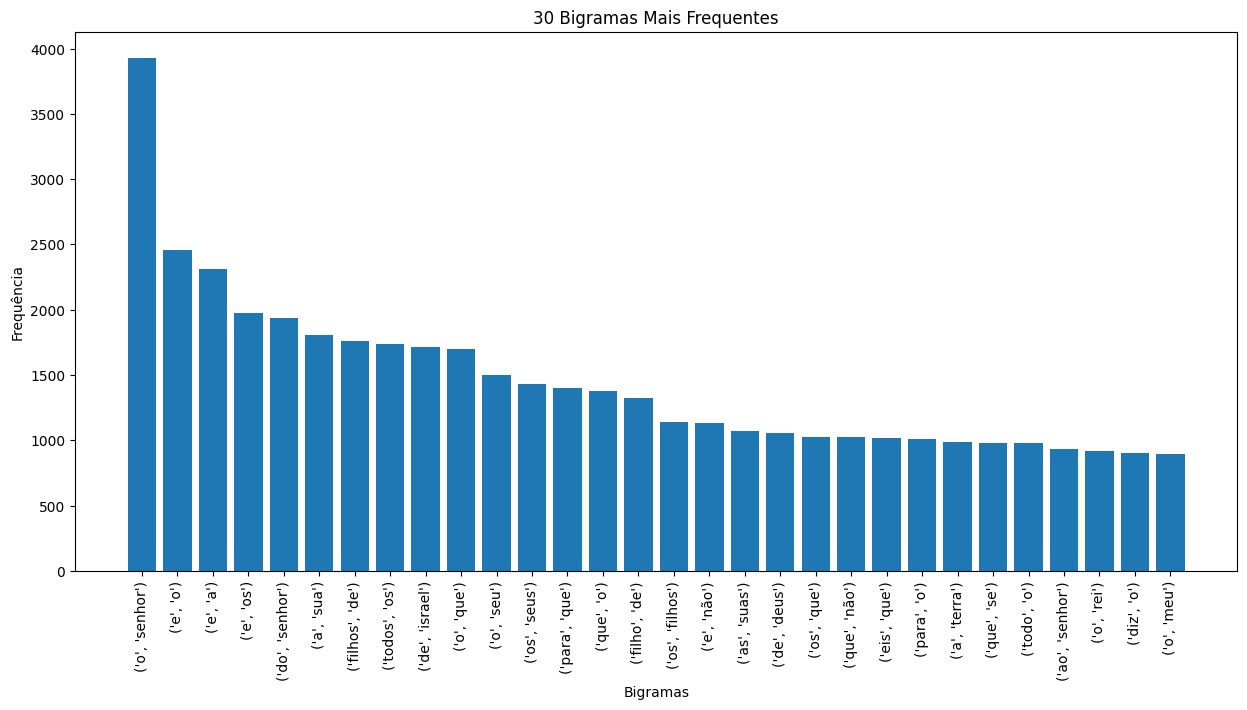

In [2]:
import operator
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

PORCENTAGEM_CORPUS = 100

def carregarArquivo(Arquivo):
	arquivo = open(Arquivo, mode='rt', encoding='UTF-8')

	text = arquivo.read()

	arquivo.close()

	return text

def tranformarEmLinhas(documento, porcentagem):
  linhas = documento.strip().split('\n')

  numLinhasUsadas = int(len(linhas)* porcentagem/100)

  if linhas[numLinhasUsadas-1]=="":
    return linhas[:numLinhasUsadas-1]
  return linhas

def construirSentencas(corpus):
  sentencas = []

  print('Corpus Construido')
  for linha in corpus:
    tokens = text_to_word_sequence(linha)
    sentencas.append(tokens)

  return sentencas

# Inicializar variaveis importantes
arquivoDados = 'biblia.txt'
documento = carregarArquivo(arquivoDados)
corpus = tranformarEmLinhas(documento, PORCENTAGEM_CORPUS)
sentencas = construirSentencas(corpus)
palavras = []

# Criar Tokens
palavras = text_to_word_sequence(documento)
vocabulario = sorted(set(palavras))
tamanhoVocabulario = len(vocabulario)

token = Tokenizer(lower = True, split=' ')
token.fit_on_texts(documento)
sequencias = token.texts_to_sequences(documento)

# Informaçoes complementares
print('Numero de linhas:', len(corpus))
print('Numero de palavras', len(palavras))
print('Tamanho vocabulario:', tamanhoVocabulario)

print("-------------------------------------")
print("=========== Unigramas ================")
print("-------------------------------------")

# Criar unigramas
frequenciaUnigramas = nltk.FreqDist(palavras)

# Coletar os 30 unigramas com as maiores frequências em ordem decrescente
maioresUnigramas = frequenciaUnigramas.most_common(30)

# Separar os unigramas e as frequências em listas distintas
unigramas = [item[0] for item in maioresUnigramas]
frequenciaUnigramas = [item[1] for item in maioresUnigramas]

# Configurar o tamanho da figura
plt.figure(figsize=(15, 7))

# Criar o gráfico de colunas
plt.bar(unigramas, frequenciaUnigramas)

# Definir o título e os rótulos dos eixos
plt.title('30 Palavras Mais Frequentes')
plt.xlabel('Palavras')
plt.ylabel('Frequência')

# Girar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation='vertical')

plt.show()

print("-------------------------------------")
print("=========== Bigramas ================")
print("-------------------------------------")

# Criar bigramas
numeroBigramas = 2
bigramas = list(nltk.ngrams(palavras, numeroBigramas))

# Calcular a frequência dos bigramas
frequenciaBigramas = nltk.FreqDist(bigramas)

# Coletar os 30 bigramas com as maiores frequências em ordem decrescente
maioresBigramas = frequenciaBigramas.most_common(30)

# Separar os bigramas e as frequências em listas distintas
bigramas = [item[0] for item in maioresBigramas]
frequenciaBigramas = [item[1] for item in maioresBigramas]

# Configurar o tamanho da figura
plt.figure(figsize=(15, 7))

# Criar o gráfico de colunas
plt.bar([str(bigram) for bigram in bigramas], frequenciaBigramas)

# Definir o título e os rótulos dos eixos
plt.title('30 Bigramas Mais Frequentes')
plt.xlabel('Bigramas')
plt.ylabel('Frequência')

# Girar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation='vertical')

plt.show()

# 3) Faça uma vetorização com Word2vec ou FastText – vetor de 64 **posições**

In [3]:
import gensim
from gensim import corpora, models, similarities
from gensim.models import Word2Vec

print("-------------------------------------")
print("=========== Vetorização ================")
print("-------------------------------------")

TAMANHO_VETOR = 64
PALAVRA = "deus"

# Treinar o modelo Word2Vec
modelo = Word2Vec([palavras], vector_size = TAMANHO_VETOR, window = 5, min_count = 1)

# Salvar o modelo treinado
modelo.save("word2vecModel.bin")

# Carregar o modelo treinado
modelo = gensim.models.Word2Vec.load("word2vecModel.bin")

# Obter o vetor de uma palavra específica
vetorPalavra = modelo.wv.get_vector(PALAVRA)

print("Vetorização da palavra:", PALAVRA)
print(vetorPalavra)


-------------------------------------
=========== Vetorização ================
-------------------------------------
Vetorização da palavra: deus
[ 0.1693432  -0.17219447  0.42306873  0.00433013 -0.16573672 -0.41177073
  0.07917675  0.11327466 -0.5271294  -0.30371922  0.22064976 -0.15867993
 -0.1937605   0.24485052 -0.20059344  0.52608764 -0.21579461  0.38589308
  0.1557308   0.20115973  0.46909872  0.67275304  0.65068287 -0.50557786
 -0.25264806  0.3079779  -0.3419241   0.03778083  0.14161575 -0.10043604
  0.12128727 -0.297433   -0.2652932  -0.1082756  -0.48828062 -0.18797322
 -0.00284689 -0.1326114   0.3334903   0.12741719 -0.09883253 -0.0884153
 -0.09609692 -0.28454444  0.52899367 -0.12049048 -0.25849733 -0.26805478
 -0.14327855  0.14314449 -0.3426507   0.14236207 -0.06681672  0.3344085
  0.13773057 -0.01556745  0.04910303 -0.3943403  -0.03160761  0.3166384
  0.08332363 -0.10018605  0.12436549 -0.14121811]


# 4) Selecione 10 palavras e para cada uma delas faça uma lista de 5 palavras mais similares

In [4]:
print("-----------------------------------------------")
print("=========== Palavras Similares ================")
print("-----------------------------------------------")

# Lista de palavras selecionadas
LISTA_PALAVRAS = ['deus', 'filhos', 'animal', 'pecado', 'sangue', 'praga', 'vestes', 'senhor', 'israel', 'servos']

# Itera sobre os items da lista, coletando as 5 palavras mais similares do item da lista
for palavra in LISTA_PALAVRAS:
  palavrasSemelhantes = modelo.wv.most_similar(palavra, topn=5)

  listaPalavrasSimilares = []

  for palavraSemelhante, valorSemelhanca in palavrasSemelhantes:
    listaPalavrasSimilares.append(palavraSemelhante)

  print(palavra + ": ", listaPalavrasSimilares)

-----------------------------------------------
=========== Palavras Similares ================
-----------------------------------------------
deus:  ['e', 'terra', 'abraão', 'o', 'de']
filhos:  ['e', 'de', 'terra', 'que', 'mulher']
animal:  ['dois', '11', 'levantou', 'deus', 'todo']
pecado:  ['zoar', 'nas', 'causa', 'fez', 'cordeiras']
sangue:  ['tenho', 'tudo', 'o', 'pois', 'é']
praga:  ['jejuaram', 'dedico', 'repousam', 'encham', 'tranqüilas']
vestes:  ['c', 'bordas', 'exaltou', 'repararem', 'terminará']
senhor:  ['do', 'disse', 'e', 'abraão', 'o']
israel:  ['nascida', 'necessidade', 'disfarçou', 'pregado', 'tantos']
servos:  ['eu', 'tem', 'ora', '5', 'este']


# 5) Análise e Plote PCA

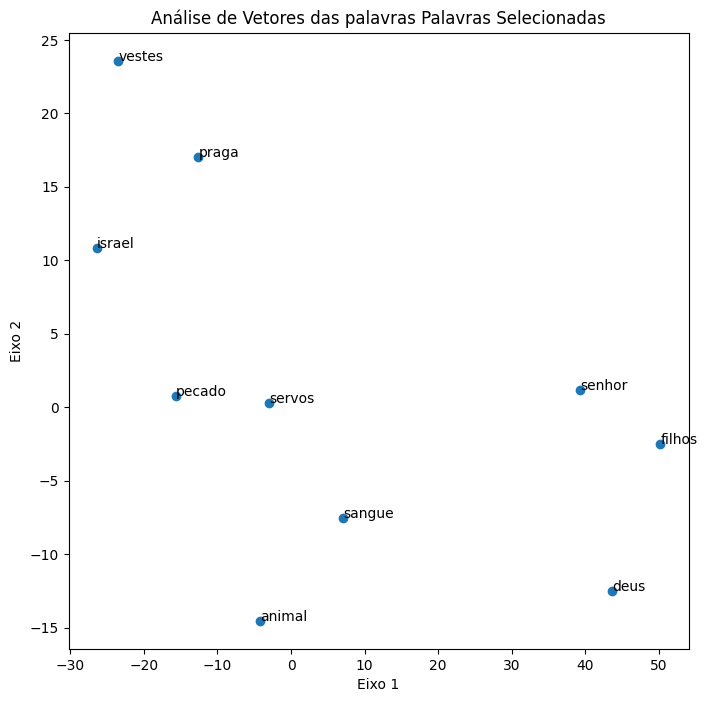

In [5]:
import numpy as np
from sklearn.manifold import TSNE

# Obter os vetores das palavras selecionadas em LISTA_PALAVRAS
vetoresSelecionados = [modelo.wv.get_vector(palavra) for palavra in LISTA_PALAVRAS]

# Converter para array NumPy
vetoresSelecionados = np.array(vetoresSelecionados)

# Reduzir a dimensionalidade com t-SNE
tsne = TSNE(n_components = 2, random_state = 42, perplexity=5)
vetoresTsne = tsne.fit_transform(vetoresSelecionados)

# Plotar os pontos no espaço t-SNE
plt.figure(figsize=(8, 8))
plt.scatter(vetoresTsne[:, 0], vetoresTsne[:, 1])
plt.xlabel('Eixo 1')
plt.ylabel('Eixo 2')
plt.title('Análise de Vetores das palavras Palavras Selecionadas')

# Adicionar os nomes das palavras como rótulos
for i, palavra in enumerate(LISTA_PALAVRAS):
    plt.text(vetoresTsne[i, 0], vetoresTsne[i, 1], palavra, fontsize=10)

plt.show()